# Importing Librarries

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import chi2
from dython import nominal

In [8]:
train_data = pd.read_csv('/content/train - train.csv')

# Preprocessing and Feture Engineering

In [9]:
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [12]:
#fucntion to check missing value from dataset
def find_missing_value(data):
  missed_val = pd.DataFrame({'column_name':[],'missing_value':[],'missing_percentage':[]})
  for col in data.columns:
    sum_missing_value = data[col].isnull().sum()
    percent_miss_value = round(sum_missing_value/data.shape[0]*100,2)
    missed_val = missed_val._append(dict(zip(missed_val.columns,[col,sum_missing_value,percent_miss_value])),ignore_index = True)
  return missed_val

In [13]:
#checking missing value percentages


missing_val = find_missing_value(train_data)
display(missing_val[missing_val['missing_percentage']>0.0])
print("\n")
print(f"Number of columns with missing values:{str(missing_val[missing_val['missing_percentage']>0.0].shape[0])}")

,column_name,missing_value,missing_percentage
4,fc,5.0,0.25
5,four_g,5.0,0.25
6,int_memory,5.0,0.25
7,m_dep,5.0,0.25
8,mobile_wt,4.0,0.20
9,n_cores,4.0,0.20
10,pc,5.0,0.25
11,px_height,4.0,0.20
12,px_width,2.0,0.10
13,ram,2.0,0.10




Number of columns with missing values:12


In [16]:
#dropping missing value as the missing percentage is very low otherwise we will do imputation

train_data.dropna(inplace=True)

In [17]:
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [20]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'Data Info'
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

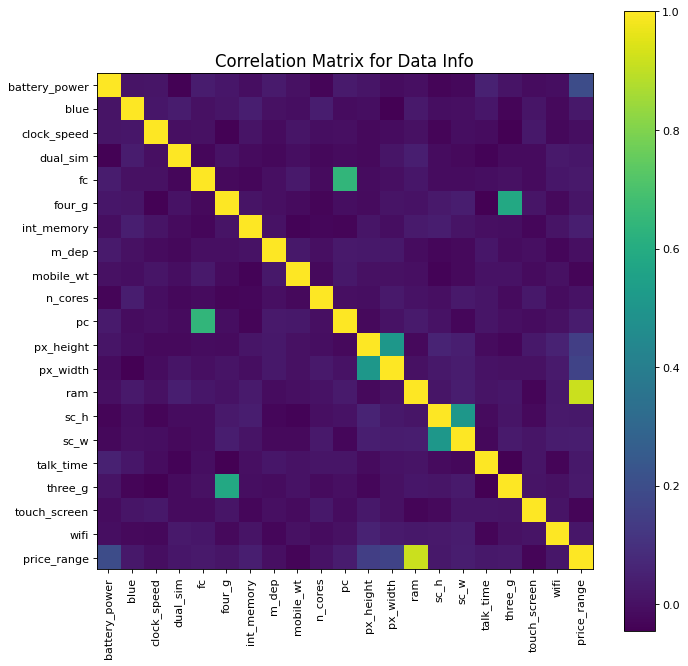

In [22]:
plotCorrelationMatrix(train_data, 10)


In [ ]:
#based on correlation matrix we will select battery_power ,px_height,  px_width , ram as feature


<Axes: xlabel='n_cores', ylabel='int_memory'>

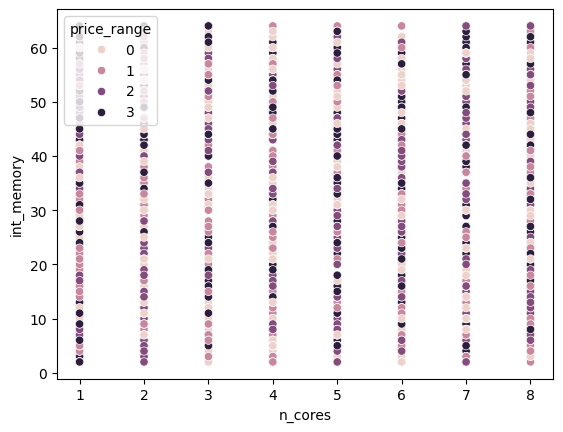

In [26]:
sns.scatterplot(x=train_data["n_cores"], y= train_data["int_memory"], hue=train_data["price_range"])

<Axes: xlabel='sc_h', ylabel='sc_w'>

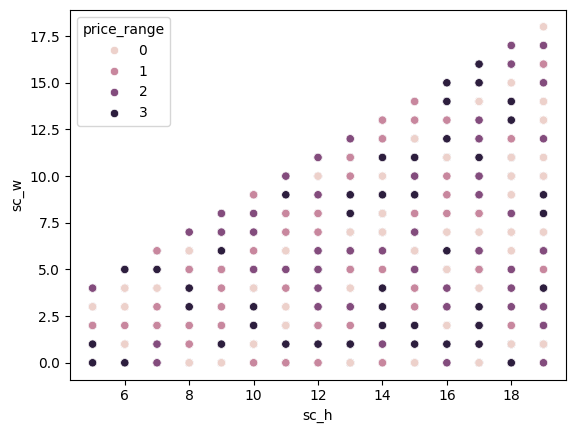

In [27]:
sns.scatterplot(x=train_data["sc_h"], y= train_data["sc_w"], hue=train_data["price_range"])

<Axes: xlabel='fc', ylabel='pc'>

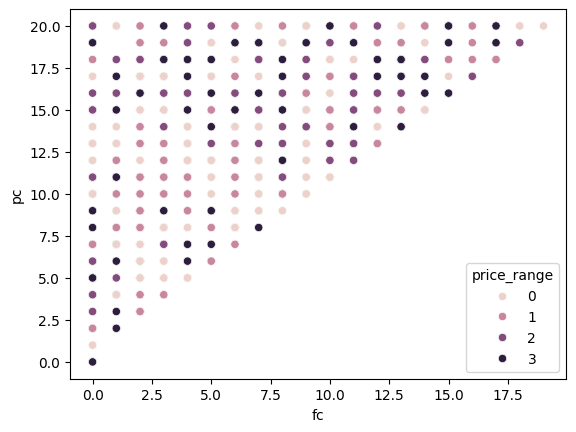

In [28]:
sns.scatterplot(x=train_data["fc"], y= train_data["pc"], hue=train_data["price_range"])

In [29]:
#copy this dataset to check some of my hypothesis
df = train_data


In [31]:
df['camere_ratio'] = df['fc'] / df['pc']

In [44]:
df['screen_ratio'] = df['sc_h'] / df['sc_h']
df['memory_cores'] = df['n_cores'] * df['int_memory']
df['px_ratio'] = df['px_height'] * df['px_width']

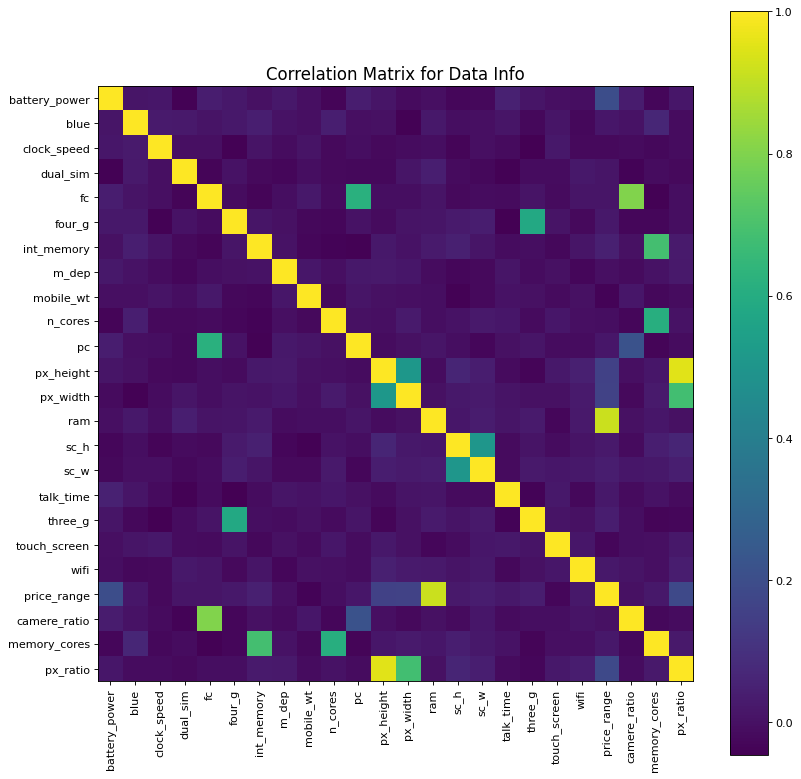

In [45]:
plotCorrelationMatrix(df, 12)


In [36]:
df['screen_ratio']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
Name: screen_ratio, Length: 1991, dtype: float64

In [46]:
#no ratio has any significant effect except px_ratio . so we will add this our train data

train_data['px_ratio'] = train_data['px_height'] * train_data['px_width']

<Axes: xlabel='battery_power', ylabel='ram'>

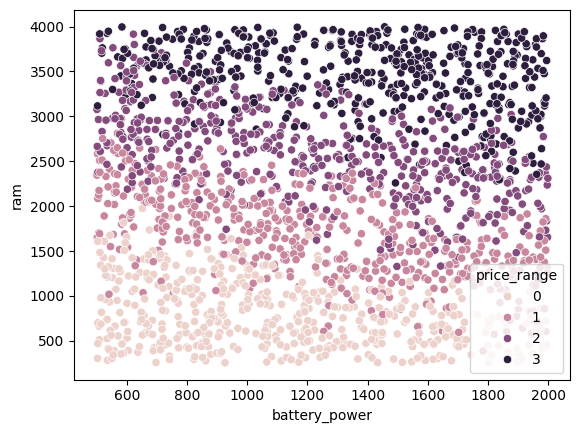

In [39]:
sns.scatterplot(x=train_data["battery_power"], y= train_data["ram"], hue=train_data["price_range"])

<Axes: xlabel='px_height', ylabel='px_width'>

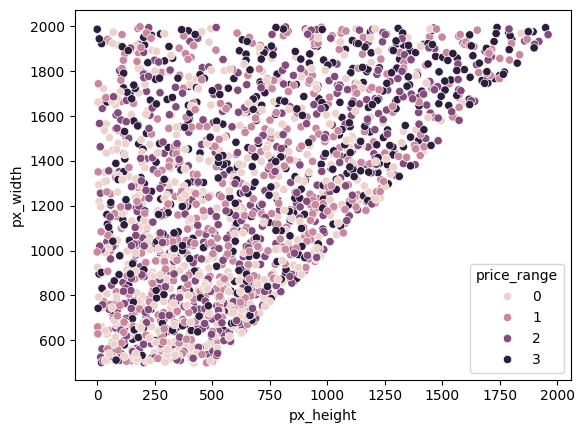

In [40]:
sns.scatterplot(x=train_data["px_height"], y= train_data["px_width"], hue=train_data["price_range"])

# feature selection and accuracy matrics definitiion

In [47]:
features = ['battery_power','ram','px_ratio']
X = train_data[features]
y= train_data['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
def accuracy_metrics(y_test,predictions):
  from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
  precision = precision_score(y_test,predictions,average = 'weighted')
  recall = recall_score(y_test,predictions,average = 'weighted')
  f1_score = f1_score(y_test,predictions,average = 'weighted')
  accuracy = accuracy_score(y_test,predictions)

  print('Accuracy score: {0:0.2f}'.format(
      accuracy))
  print('Average precision score: {0:0.2f}'.format(
      precision))
  print('recall score: {0:0.2f}'.format(
    recall))
  print('f1score: {0:0.2f}'.format(
    f1_score))

# Model training and evaluation

In [69]:
from sklearn.ensemble import RandomForestClassifier
rndcl = RandomForestClassifier(n_estimators=100)
rndcl.fit(X_train,y_train)
predictions = rndcl.predict(X_test)

In [68]:
accuracy_metrics(y_test,predictions)

Accuracy score: 0.91
Average precision score: 0.91
recall score: 0.91
f1score: 0.91


In [59]:
from sklearn.metrics import classification_report

# Assuming y_test and predictions are your actual and predicted labels, respectively
report = classification_report(y_test, predictions)

print("Classification Report for RF:")
print(report)


Classification Report for RF:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       157
           1       0.87      0.88      0.88       142
           2       0.94      0.82      0.88       158
           3       0.89      0.99      0.94       141

    accuracy                           0.91       598
   macro avg       0.91      0.91      0.91       598
weighted avg       0.91      0.91      0.91       598



Confusion Matrix for RF:


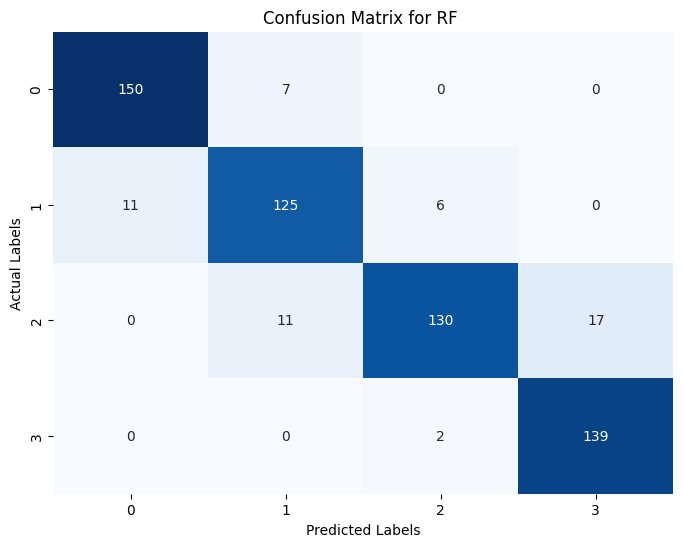

In [60]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix for RF:")
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for RF ')
plt.show()


In [57]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)
pd = nv.predict(X_test)
accuracy_metrics(y_test,pd)


Accuracy score: 0.79
Average precision score: 0.79
recall score: 0.79
f1score: 0.79


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predicted = knn.predict(X_test)
accuracy_metrics(y_test,predicted)

Accuracy score: 0.30
Average precision score: 0.29
recall score: 0.30
f1score: 0.29


# Hyper parameter tuning for RF

In [71]:
from sklearn.model_selection import RandomizedSearchCV


# Create a Random Forest Classifier object


# Define the hyperparameters and their values to be tuned
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rndcl, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Accuracy: 0.9046822742474916


# Making Prediction on test data

In [54]:
test_data = pd.read_csv('/content/test - test.csv')

In [55]:
test_data['px_ratio'] = test_data['px_height'] * test_data['px_width']

In [62]:
fet = ['battery_power','ram','px_ratio']
test_x = test_data[fet]


In [63]:
test_predictions = rndcl.predict(test_x)
print(test_predictions)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 3 0 3 0 0 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 2 0 2 1 1 1 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 0 2 1 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 1 3 0 0 3 2 1 1 0 3 2 3 1 0 2 1 1 3 1 1 0 3 2 1 3 1 2 2 3 3 3
 2 3 3 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 3 3 1 2 3 2 3 2 2 1 0 1 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 0 3 2 1 2 3 3 3 1 1 1 2 3 2 1 3 2 1 3 0 0 3 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 3 3 1
 2 2 2 3 1 3 3 2 2 3 3 3 0 3 0 3 1 3 1 3 3 0 1 0 3 1 3 1 3 0 0 0 0 2 0 0 2
 2 1 2 3 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 2 0 3 0 1 1 1 2 0 3 2 3 3 1 3 2 3 1 3 2 0 2 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 3 0 0 3 1 1 0 3 3 3 0 3 0 2 3 3 3 0 2 0 2 3 0 1 2 0 0 1
 1 1 3 3 3 2 3 1 2 2 3 3 

# save the model


In [72]:
import pickle


# Assuming you have already trained your model and stored it in the variable 'model'

# Save the trained model to a file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rndcl, file)
